In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy import linalg
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Data loading

In [3]:
data = pd.read_csv("C://Users//deept//Downloads//data (1).csv")
#sample view of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [5]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

There are no null values in the data.
There are 33 columns in the data. Except the target every feature value is numerical.

# Exploratory Data Analysis

In [6]:
#targets distribution
data['diagnosis'].unique() 


array(['M', 'B'], dtype=object)

Here the target value is 'diagnosis' and the possible values are:

Malignant
Benign

In [7]:
#statistical overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


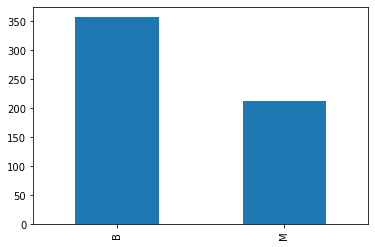

In [8]:
#targets distribution
data['diagnosis'].value_counts().plot.bar()
plt.show()

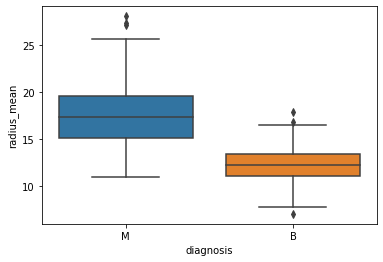

In [9]:
sns.boxplot(y='radius_mean',x='diagnosis',
            data=data)
plt.show()

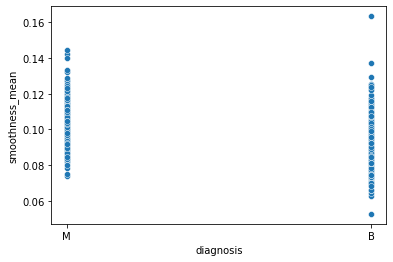

In [10]:
sns.scatterplot(y='smoothness_mean',x='diagnosis',data=data)
plt.show()

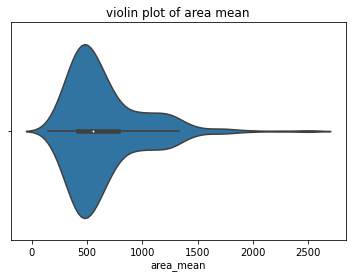

In [11]:
sns.violinplot(x='area_mean',data=data)
plt.title('violin plot of area mean')
plt.show()

Conclusions:

1. Since this is a medical dataset we can expect the dataset be imbalanced.
   Here the malignant class is dominated by benign.

2. Malignant means presence of the tumor in the breast so when we plotted    radius mean vs diagnosis. Malignant classes have the higher radius mean than the benign classes.

3. For both the classes smoothness mean is same that is displayed in the scatterplot

In [12]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
#slicing the dataset with mean values
data_mean = data.iloc[:,0:12]
data_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572
...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260


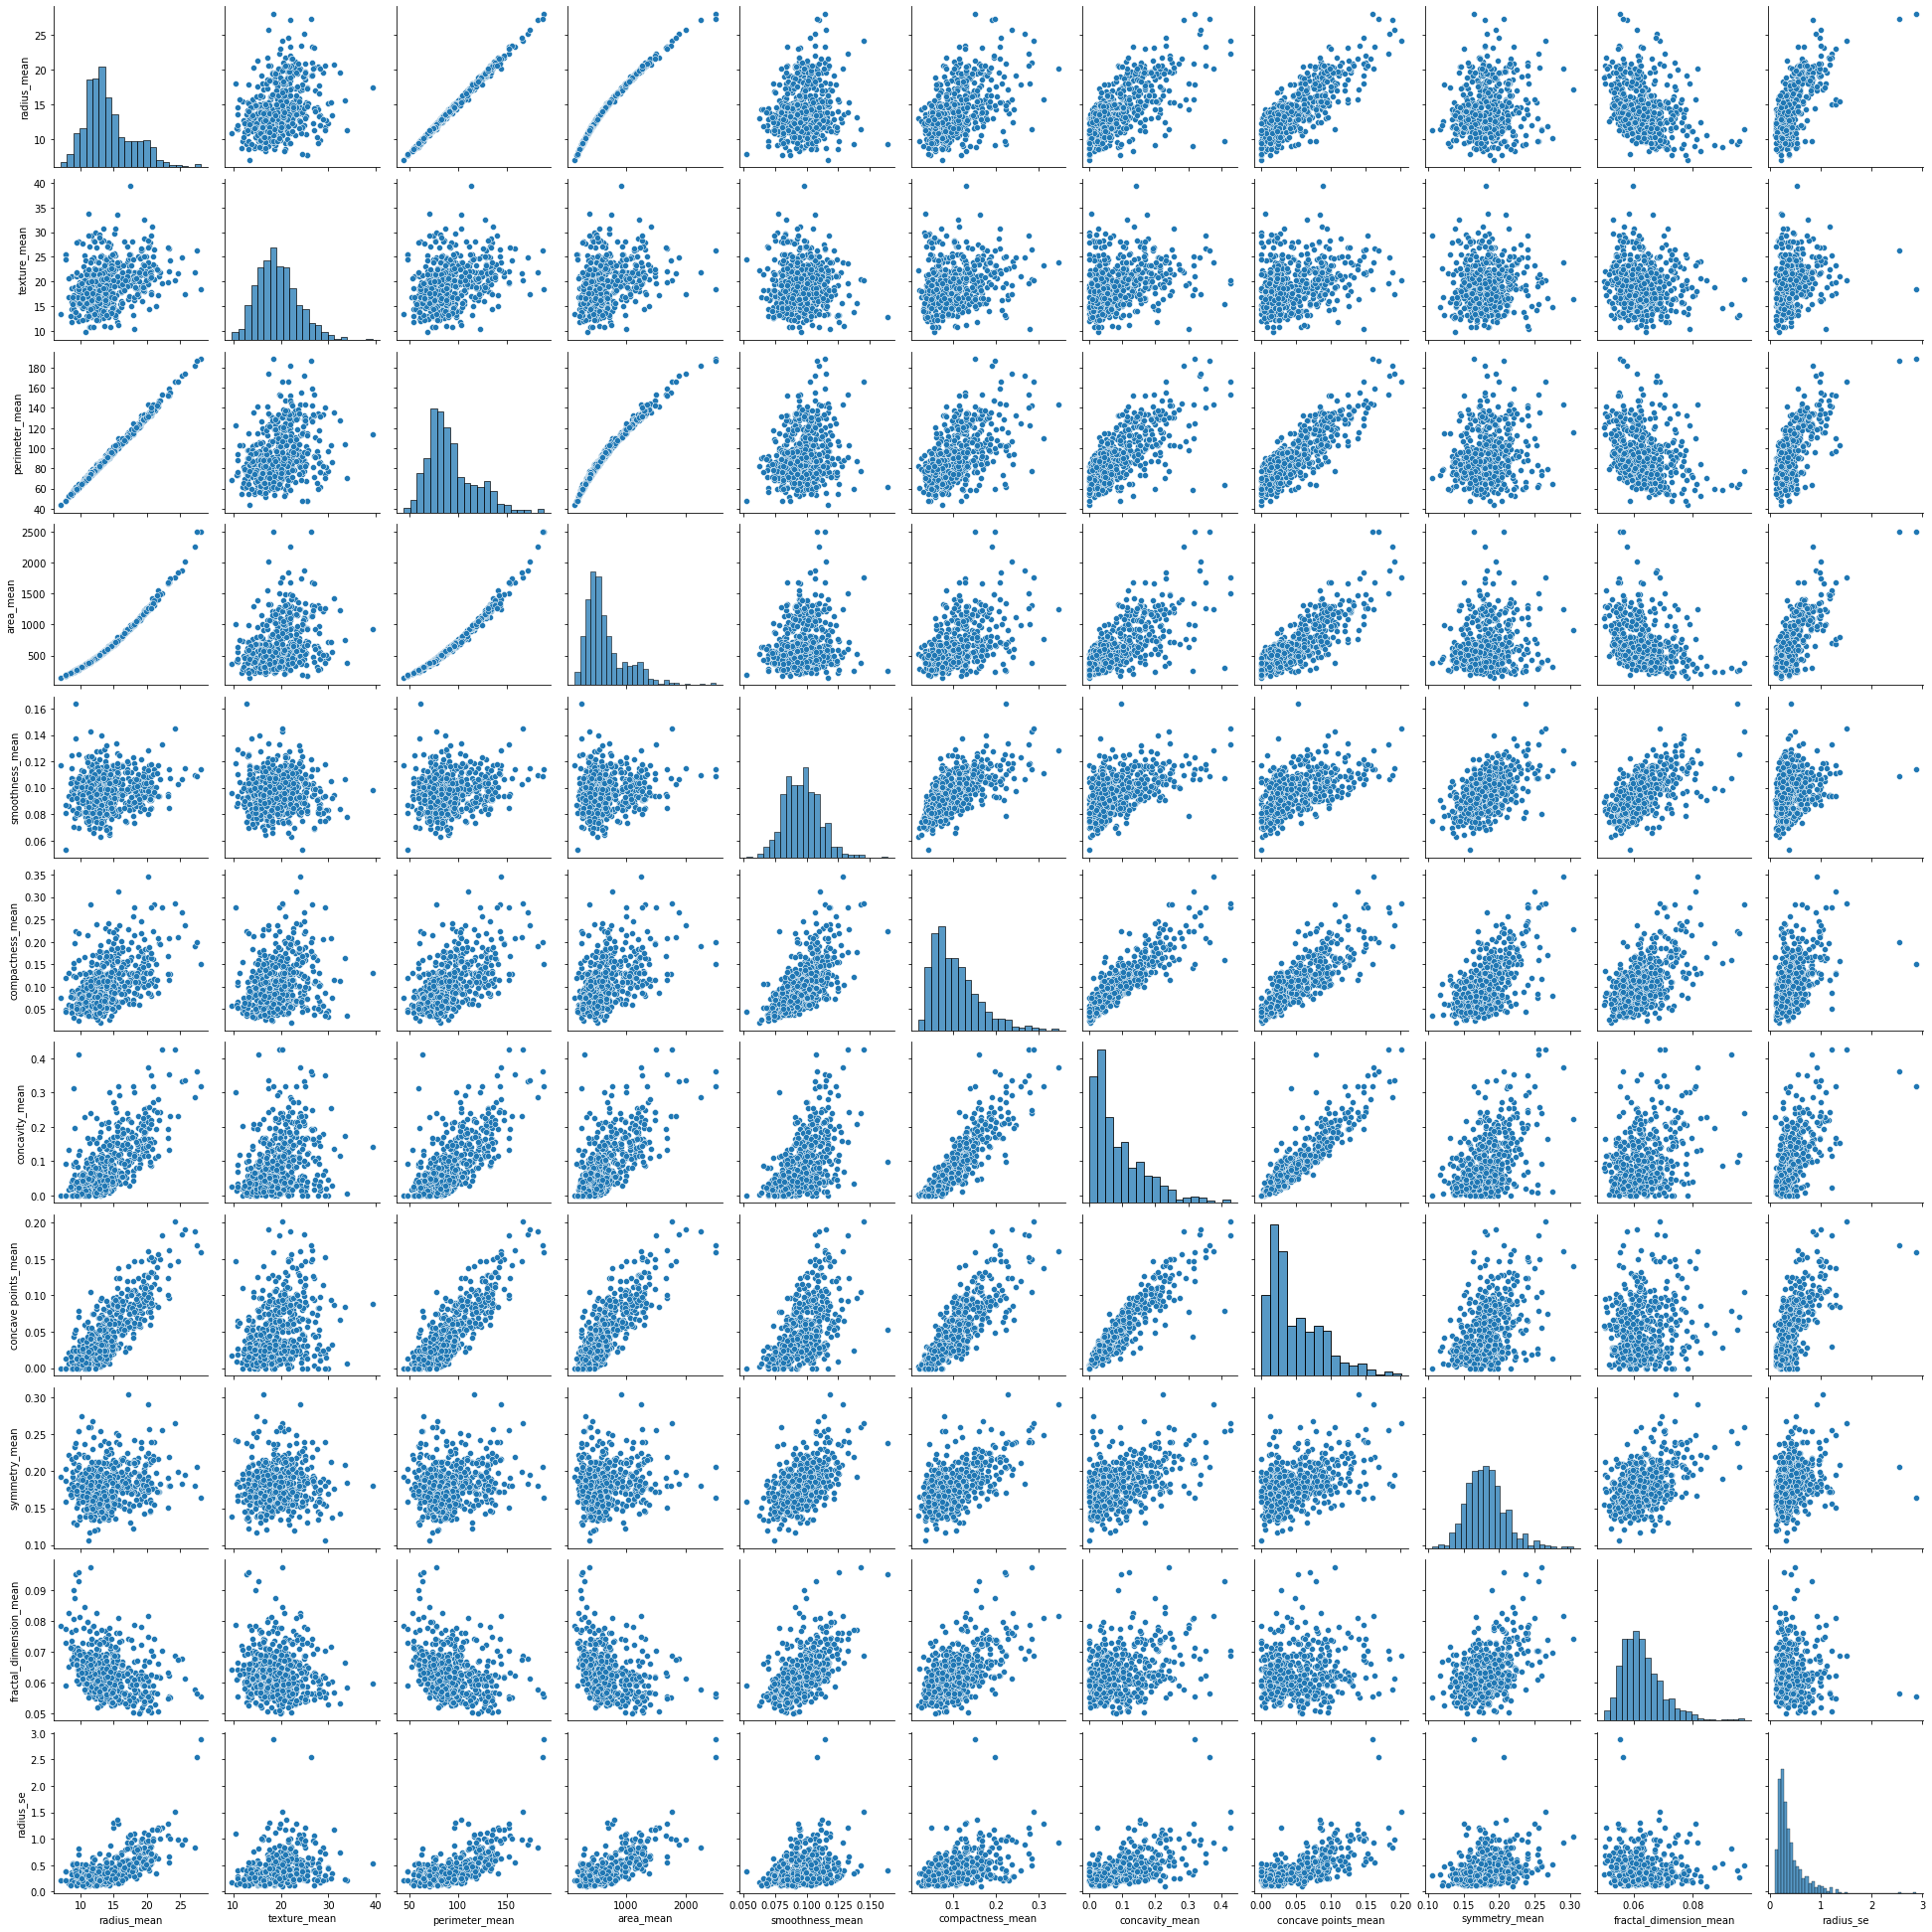

In [14]:
sns.pairplot(data=data_mean)
plt.show()

Conclusions:

1. Area mean has exponential growth and the perimeter mean has linear correlation.

2. Most of the distributions are left skewed

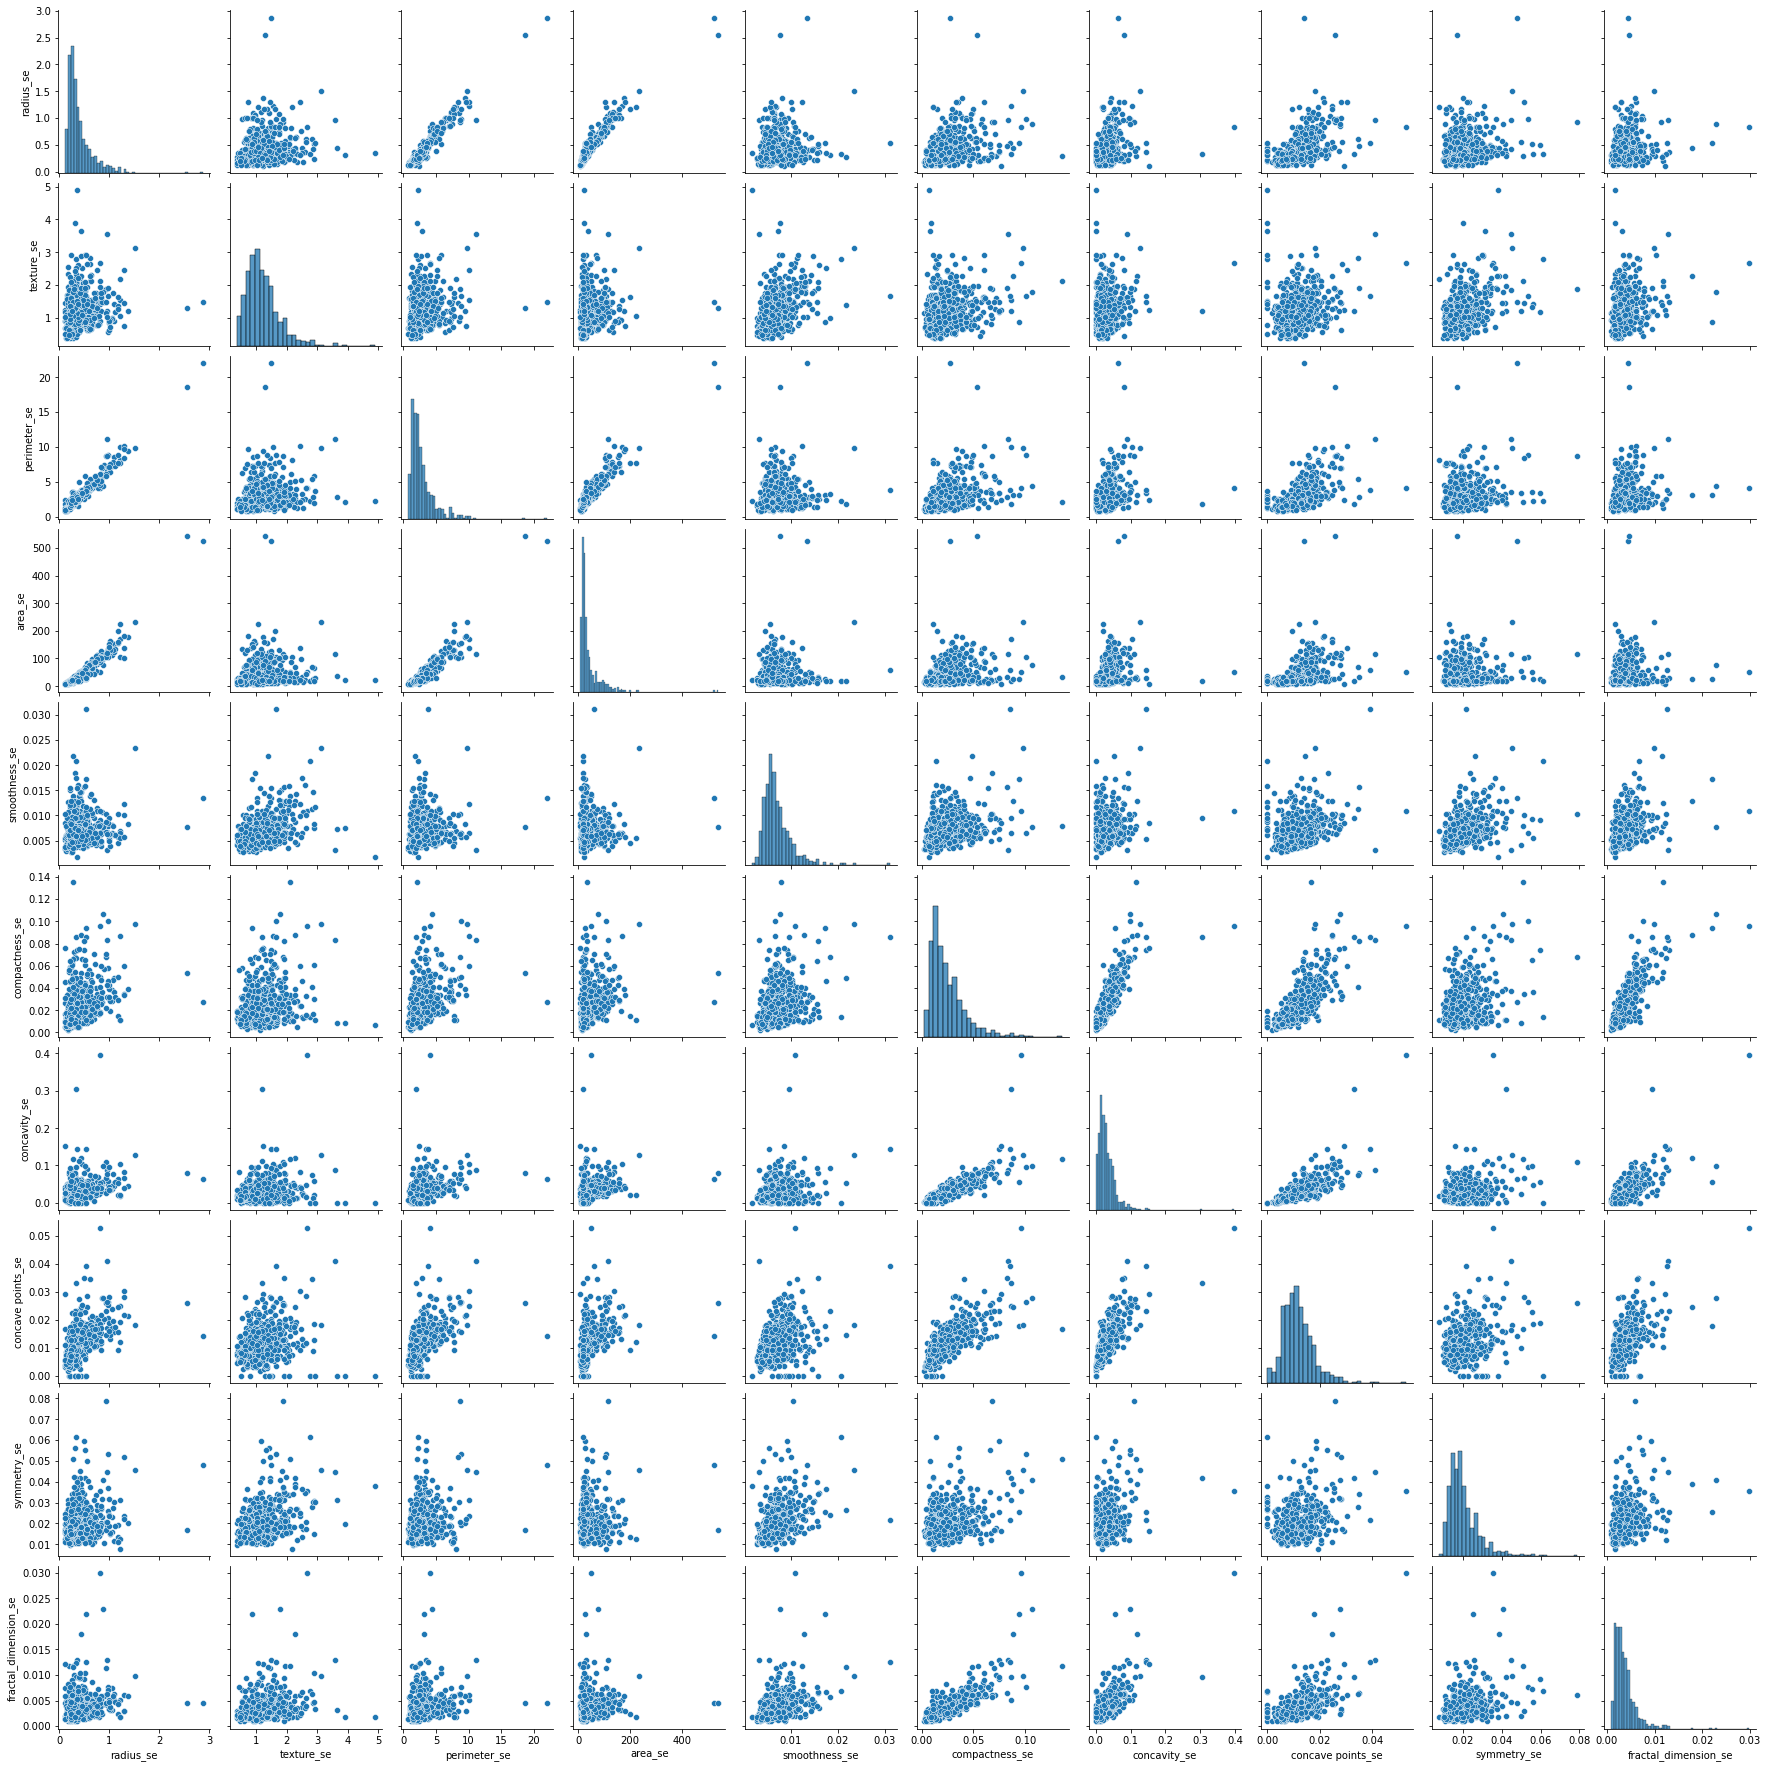

In [15]:
#slicing the dataset into se values
data_se = data.iloc[:,11:21]
sns.pairplot(data=data_se)
plt.show()

Conlcusions:

1. Most of the distributions are left skewed
2. We can observe the presence of outliers in the data

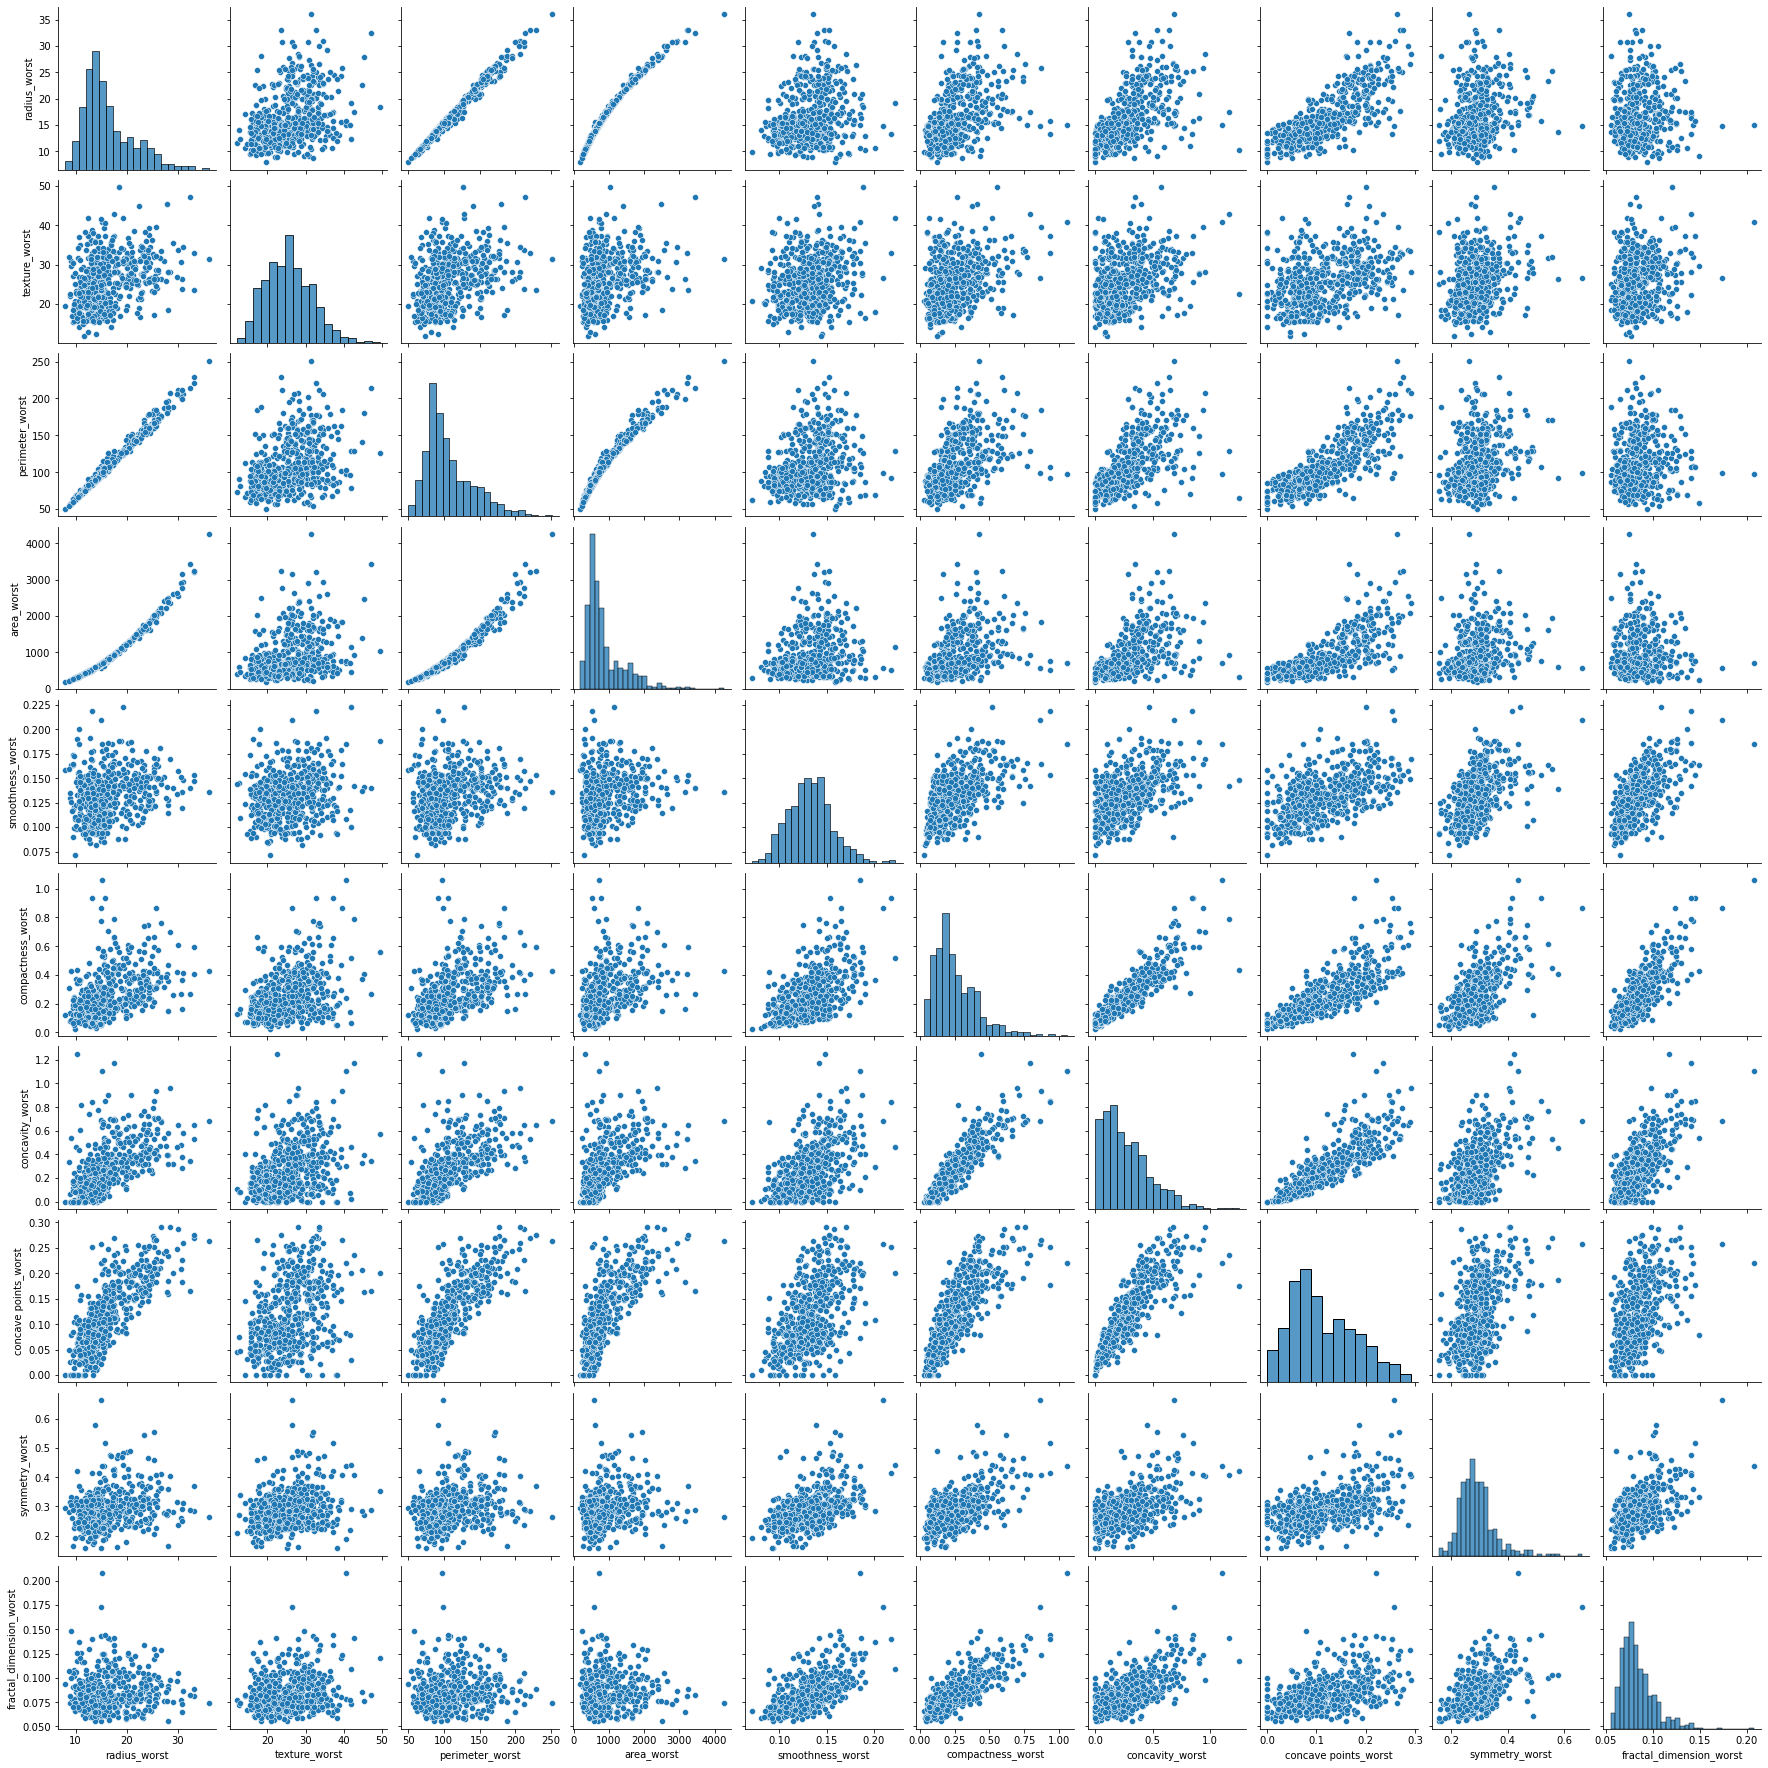

In [16]:
#slicing the data with worst parameters
data_worst = data.iloc[:,21:]
sns.pairplot(data=data_worst)
plt.show()

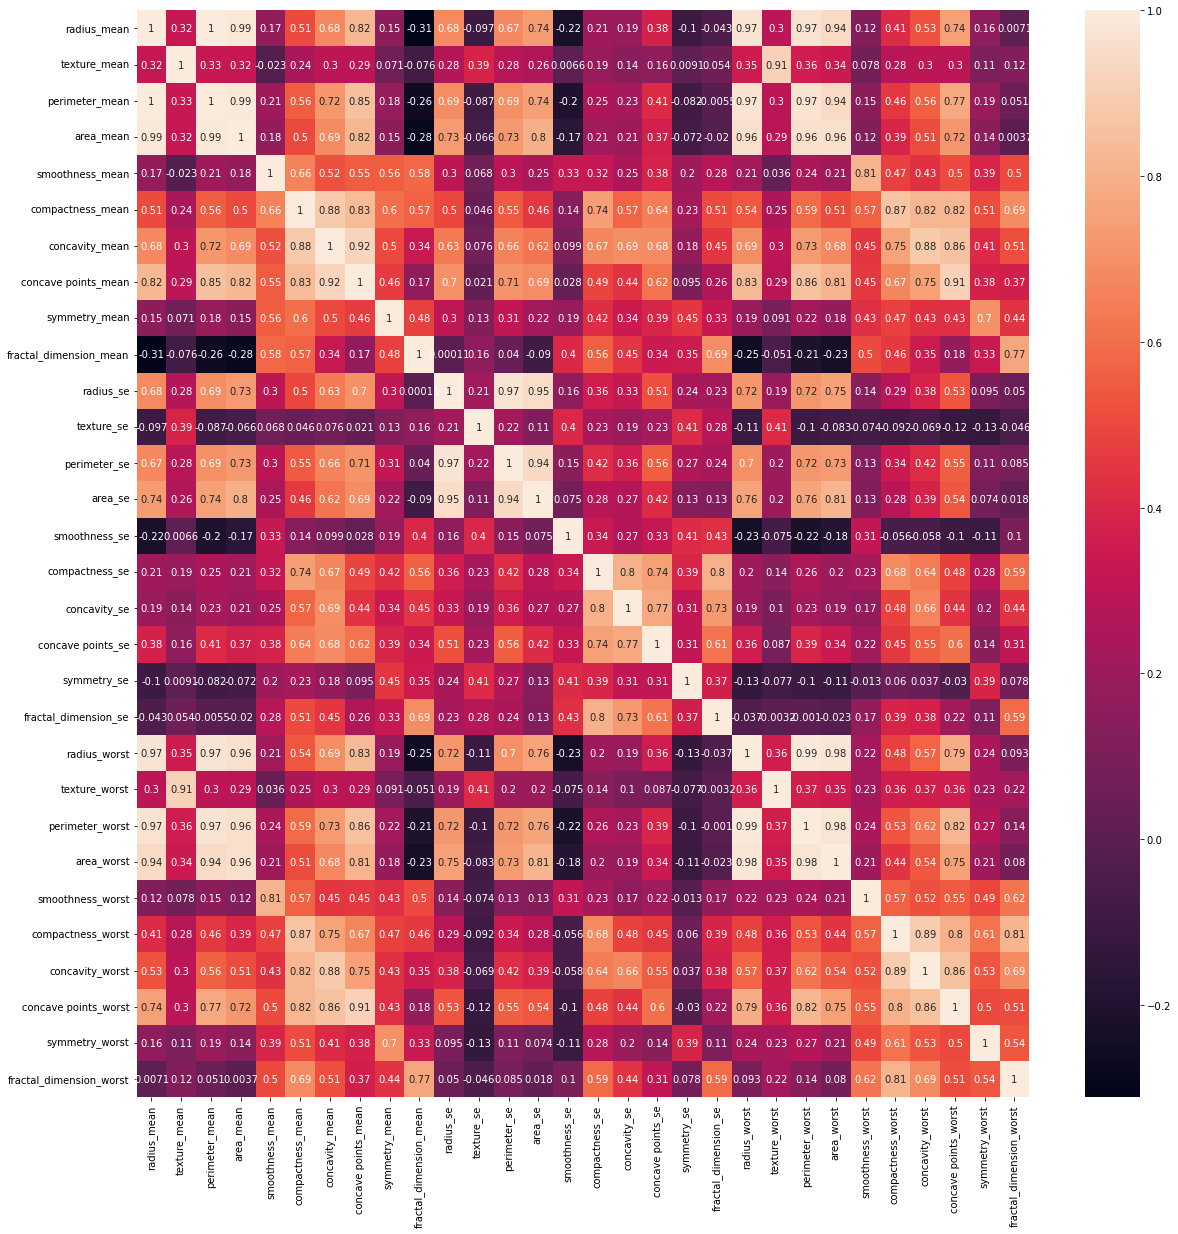

In [17]:
#correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Encoding targets

In [21]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Baseline model

In [25]:
#seperating features and targets
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#base line model
baseline_model = SVC()
baseline_model.fit(X_train,y_train)

#baseline model predictions
base_preds = baseline_model.predict(X_test)
print(classification_report(base_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       120
           1       0.80      1.00      0.89        51

    accuracy                           0.92       171
   macro avg       0.90      0.95      0.91       171
weighted avg       0.94      0.92      0.93       171



# Applying LDA

In [26]:
#initializing the LDA object and choosing the components
lda = LinearDiscriminantAnalysis(n_components=1)
qda = QuadraticDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_train.shape)

Original Data shape: (569, 30) 
Modified Data shape: (398, 30)


In [27]:
#base model
model = SVC()
model.fit(X_train_lda,y_train)

#predictions
preds = model.predict(X_test_lda)

#classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



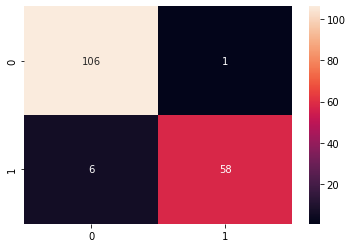

In [39]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='g')
plt.show()

# Applying QDA  


In [40]:
qda = QuadraticDiscriminantAnalysis()
# Training
qda.fit(X_train, y_train.ravel())
# Prediction
y_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)
print(classification_report(y_test,y_pred_qda))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



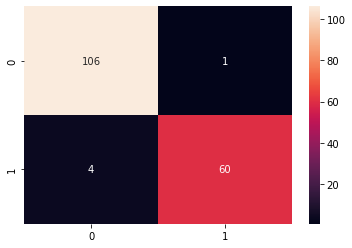

In [38]:
confusion_matrix_qda = confusion_matrix(y_test, y_pred_qda)
false_positive_rate_qda, true_positive_rate_qda, thresholds = roc_curve(
    y_test, y_prob_qda
    )
roc_auc_qda = auc(false_positive_rate_qda, true_positive_rate_qda)

#confusion matrix
sns.heatmap(confusion_matrix_qda,annot=True,fmt='g')
plt.show()


In [32]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')2
  plt.axis('tight')
  plt.ylabel('True Positive Rtae')
  plt.xlabel('False Positive Rtae')

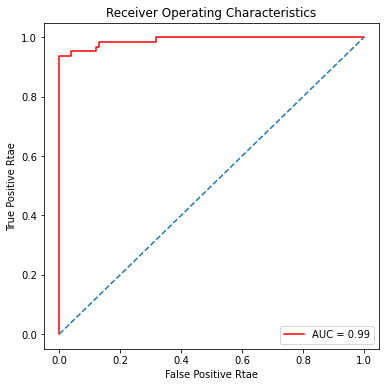

In [33]:
plot_roc(roc_auc_qda, false_positive_rate_qda, true_positive_rate_qda)